In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
xlsx = pd.ExcelFile('Otw4_mgr.xlsx')
df_train = pd.read_excel(xlsx, 'Arkusz2')
df_test = pd.read_excel(xlsx, 'Arkusz1')

# Performing EDA on Train set and Test set 

In [3]:
df_train.describe()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.055960,0.089611,0.004280,0.027840,0.815231,0.007077,217.743169,83.744491,11.939871,12.351689,194.087751,181.39024,145.743326,0.293788,4.519774,11.513640,4.393631,2.585526,2.297714
std,0.072562,0.096960,0.006175,0.045081,0.053240,0.005668,0.736027,8.475774,10.564558,10.693909,64.384158,51.96734,22.431829,0.055278,0.278910,1.416542,3.536165,0.105450,3.290360
min,0.000000,0.000000,0.000000,0.000100,0.669200,0.000000,216.720400,74.640600,5.935900,5.419400,137.076700,129.46500,111.315200,0.242666,3.979300,7.654300,1.094700,2.332000,0.100000
25%,0.000200,0.000300,0.000400,0.000200,0.776500,0.003800,217.091250,77.781225,6.496000,6.453200,153.226650,147.84340,130.558750,0.258005,4.320650,10.706250,2.315150,2.553100,0.180000
50%,0.000600,0.049700,0.000700,0.004700,0.806600,0.006600,217.683100,80.453100,6.876600,6.750100,165.109300,154.99450,140.038100,0.271260,4.508400,11.890600,2.796700,2.624300,0.560000
75%,0.122000,0.180450,0.006100,0.020000,0.865850,0.008600,218.259650,86.839875,9.450850,11.081150,192.224900,183.42645,165.350250,0.292808,4.642250,12.524350,4.073700,2.657100,2.920000
max,0.220500,0.315800,0.020900,0.122700,0.900200,0.026900,219.026700,100.515600,47.636300,44.772700,330.530300,285.90200,204.642900,0.417709,5.131300,14.298600,12.357300,2.697400,10.120000


In [4]:
df_train.shape

(35, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


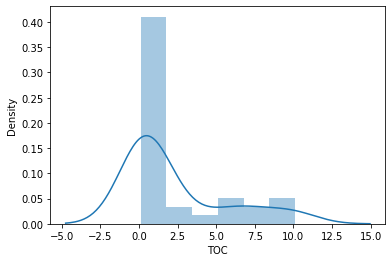

In [5]:
# Histogram of TOC
sns.distplot(df_train['TOC'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


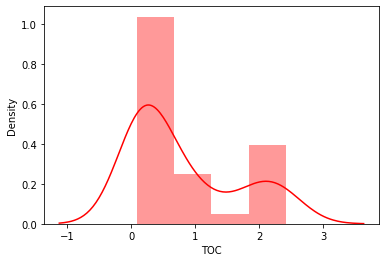

In [6]:
sns.distplot(np.log1p(df_train["TOC"]) , color = "r")

In [7]:
df_train.isnull().sum()

Vsand        0
Vlime        0
Vpiryt       0
Vkerogen     0
VCL          0
PHI          0
CAL          0
DT           1
LLD          0
LL3          0
GG_Core      0
GR           0
GRS_Core     0
NPHI_Core    0
POTA         0
THOR         0
URAN         0
RHOB         0
TOC          0
dtype: int64

In [8]:
#missing data Train set
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
DT,1,0.028571
Vsand,0,0.000000
GG_Core,0,0.000000
RHOB,0,0.000000
URAN,0,0.000000
THOR,0,0.000000
POTA,0,0.000000
NPHI_Core,0,0.000000
GRS_Core,0,0.000000
GR,0,0.000000


In [9]:
df_test.describe()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,286.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,35.000000
mean,0.055261,0.110405,0.005065,0.016872,0.805848,0.006549,217.813744,81.863855,9.676185,10.062527,178.448302,169.119733,141.061207,0.281699,4.556348,11.427761,3.547804,2.610569,2.297714
std,0.071954,0.115123,0.007981,0.033469,0.076689,0.005418,0.809446,6.944101,8.386990,8.362479,50.760124,41.044119,20.936882,0.045912,0.346125,1.518463,2.718195,0.084999,3.290360
min,0.000000,0.000000,0.000000,0.000000,0.351000,0.000000,216.590900,69.609400,5.843000,5.230400,68.968300,100.021600,59.950400,0.149508,3.326500,6.624500,0.868600,2.324900,0.100000
25%,0.000200,0.000300,0.000500,0.000200,0.775950,0.002800,217.040500,77.167925,6.413125,6.354025,150.332150,144.864500,126.483275,0.258903,4.339625,10.347900,2.182725,2.590725,0.180000
50%,0.000700,0.090200,0.000800,0.001950,0.805400,0.005200,217.973900,79.882800,6.729850,6.662950,162.883000,154.990600,139.045950,0.269803,4.526450,11.590300,2.693550,2.636250,0.560000
75%,0.117775,0.196375,0.006925,0.011175,0.859500,0.009050,218.443150,83.289050,7.695750,8.683100,182.321250,169.928900,150.643450,0.286541,4.757775,12.508900,3.469650,2.663425,2.920000
max,0.233100,0.629600,0.043900,0.128800,0.952400,0.027100,221.043500,101.750000,50.231700,46.533300,336.001700,287.704300,205.955800,0.424293,5.295700,15.311200,12.357300,2.728600,10.120000


In [10]:
df_test.shape

(296, 19)

In [11]:
df_test.isnull().sum()

Vsand          0
Vlime          0
Vpiryt         0
Vkerogen       0
VCL            0
PHI            0
CAL            0
DT            10
LLD            0
LL3            0
GG_Core        0
GR             0
GRS_Core       0
NPHI_Core      0
POTA           0
THOR           0
URAN           0
RHOB           0
TOC          261
dtype: int64

In [12]:
#missing data Test set
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
TOC,261,0.881757
DT,10,0.033784
GG_Core,0,0.000000
RHOB,0,0.000000
URAN,0,0.000000
THOR,0,0.000000
POTA,0,0.000000
NPHI_Core,0,0.000000
GRS_Core,0,0.000000
GR,0,0.000000


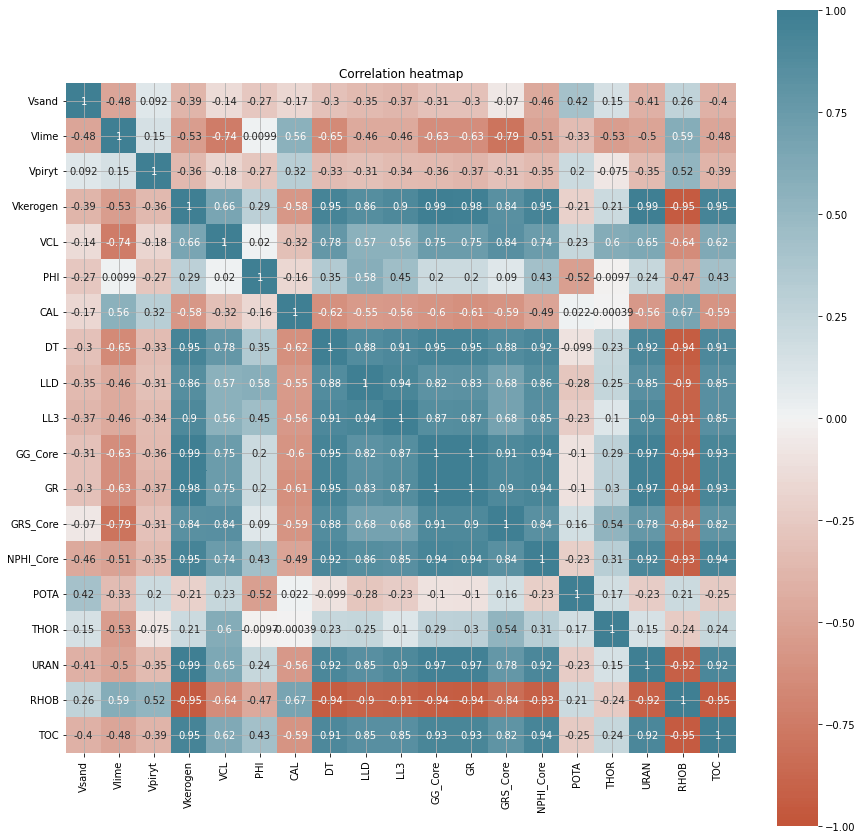

In [13]:
names = df_train.columns
corr_mat = df_train.corr(method='pearson')
fig, ax1 = plt.subplots(figsize=(15,15))
ax1 = sns.heatmap(corr_mat, 
                  center=0,
                  vmin = -1, 
                  vmax = 1, 
                  annot= True,
                  cmap= sns.diverging_palette(20,220, n=200), 
                  square=True, 
                  yticklabels=names, 
                  xticklabels=names)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Correlation heatmap')
plt.grid(b=True)

# Support Vector Regression - Sklearn

In [14]:
# Preparing data for the model
df_train = df_train.fillna(0)

# logarithmic transformation
df_train = np.log1p(df_train) #natural logarithm

In [15]:
X= df_train.iloc[:, 0:-1].values
y= df_train.iloc[:,-1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(28, 18)
(7, 18)


In [17]:
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for GridSearchCV
parameters = {'kernel': ['rbf'],  #, 'linear', 'sigmoid', 'poly'
               'epsilon': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'C': [1, 10, 100, 1000, 10000]}
print("Tuning hyper-parameters")

scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr = GridSearchCV(SVR(), parameters, cv = K, scoring=scorer)
grid_result= svr.fit(X_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
print("Loss function: %.3f    with best parameters %s \n" % (grid_result.best_score_, grid_result.best_params_))

"""
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
""" 

Tuning hyper-parameters
Grid scores on training set:
Loss function: -0.085    with best parameters {'C': 100, 'epsilon': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'} 



'\nmeans = svr.cv_results_[\'mean_test_score\']\nstds = svr.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, svr.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))\n'

In [18]:
# Loss function: -0.084708 with best parameters {'C': 100, 'epsilon': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'} 
# Loss function: -0.130396 with best parameters {'C': 1, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'linear'}
# Loss function: -0.139181 with best parameters {'C': 1000, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'poly'
# Loss function: -0.113992 with best parameters {'C': 100, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}

#regr = SVR(kernel = 'rbf', epsilon=0.01, C=10, gamma=0.2)   
#regr = SVR(kernel = 'linear', epsilon=0.3, C=1, gamma=0.0001)
regr = SVR(kernel = 'poly', epsilon=0.2, C=1000, gamma=0.001)
#regr = SVR(kernel = 'sigmoid', epsilon=0.1, C=100, gamma=0.001)



regr.fit(X_train, y_train)

SVR(C=1000, epsilon=0.2, gamma=0.001, kernel='poly')

In [19]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
print(y_pred_test,'\n', y_pred_train)

[0.7390043  0.20298287 0.38064225 1.92777374 1.87940663 0.48815413
 0.44051443] 
 [0.42477405 0.36170177 1.96716584 2.17278975 0.7578748  0.60758711
 1.87765476 0.58883371 0.45449409 0.22592678 0.41613202 0.32020525
 0.41193125 0.69163529 2.20859904 0.49484774 0.41196481 0.40043555
 2.10224198 0.38191573 0.31910977 1.58200425 0.35691757 0.36536938
 0.40003731 0.53801019 0.48846523 0.52600193]


In [20]:
print('R2 score on the Train set is: \t{:0.3f}'.format(r2_score(y_train, y_pred_train)))
print('R2 score on the Test set is: \t{:0.3f}'.format(r2_score(y_test, y_pred_test)))
print('MSE score on the Train set is: \t{:0.3f}'.format(mean_squared_error(y_train, y_pred_train)))
print('MSE score on the Test set is: \t{:0.3f}'.format(mean_squared_error(y_test, y_pred_test)))

R2 score on the Train set is: 	0.834
R2 score on the Test set is: 	0.846
MSE score on the Train set is: 	0.104
MSE score on the Test set is: 	0.123


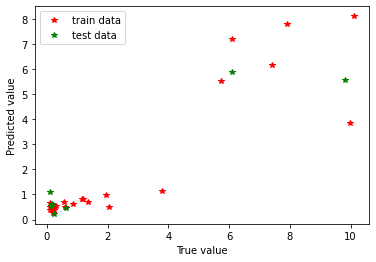

In [21]:
plt.plot(np.expm1(y_train), np.expm1(y_pred_train),'*r', label='train data')
plt.plot(np.expm1(y_test), np.expm1(y_pred_test), '*g', label='test data')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()

# Predict unknown data for the whole dataset

In [22]:
# fill NaN for Test set
df_test = df_test.fillna(0)
df_test = np.log1p(df_test)

# get the data for predictions
rows = df_test.iloc[:, 0:-1].values
cols = df_test.iloc[:, -1].values

In [23]:
# make prediction for unknown TOC values

rows_pred = np.expm1(regr.predict(rows))

In [24]:
TOC_col = pd.DataFrame(rows_pred, columns=['pred_TOC'])
TOC_col = TOC_col.round(decimals=2)
TOC_col.to_excel('SVR_pred.xlsx')
print(TOC_col.head(60))

    pred_TOC
0       0.73
1       0.75
2       0.73
3       0.72
4       0.70
5       0.69
6       0.67
7       0.66
8       0.66
9       0.65
10      0.65
11      0.64
12      0.66
13      0.67
14      0.67
15      0.66
16      0.64
17      0.61
18      0.57
19      0.54
20      0.53
21      0.53
22      0.55
23      0.59
24      0.63
25      0.67
26      0.69
27      0.69
28      0.68
29      0.66
30      0.63
31      0.60
32      0.56
33      0.52
34      0.48
35      0.44
36      0.41
37      0.38
38      0.37
39      0.38
40      0.40
41      0.43
42      0.47
43      0.50
44      0.52
45      0.54
46      0.57
47      0.57
48      0.56
49      0.54
50      0.52
51      0.51
52      0.49
53      0.48
54      0.47
55      0.46
56      0.45
57      0.46
58      0.46
59      0.47
